<center>
<h1>

`Predicting IMDb Score`

</h1>
</center>

### `Date` - 31/10/2023
### `Team ID` - 3866


# <center>  **`Import Section`** </center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics
from scipy import stats

# <center>  **`Reading Dataset`** </center>


In [2]:
data = pd.read_csv('movie_metadata.csv')
pd.set_option('display.max_columns', None)

# <center>  **`Viewing Data`** </center>

In [3]:
data

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0                      Documentary   

         actor_1_name                                        movie_title  \
0         CCH Pounder                                            Avatar    
1         Johnny Depp          Pirates of the Caribbean: At World's End    
2     Christoph Waltz                                           Spectre    
3           Tom Hardy                             The Dark Knight Rises    
4         Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   
...               ...                                                ...   
5038      Eric Mabius                           Signed Sealed Delivered    
5039      Natalie Zea                         The Following                
5040      Eva Boehnke                              A Plague So Pleasant    
5041        Alan Ruck                                  Shanghai Calling    
5042      John August                                 My Date with Drew    

      num_voted_users  cast_total_facebook_likes          actor_3_name  \
0              886204                       4834             Wes Studi   
1              471220                      48350        Jack Davenport   
2              275868                      11700      Stephanie Sigman   
3             1144337                     106759  Joseph Gordon-Levitt   
4                   8                        143                   N

# <center>  **`Data Info`** </center>

In [4]:
data.shape

(5043, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

<AxesSubplot:title={'center':'Color Distribution'}>

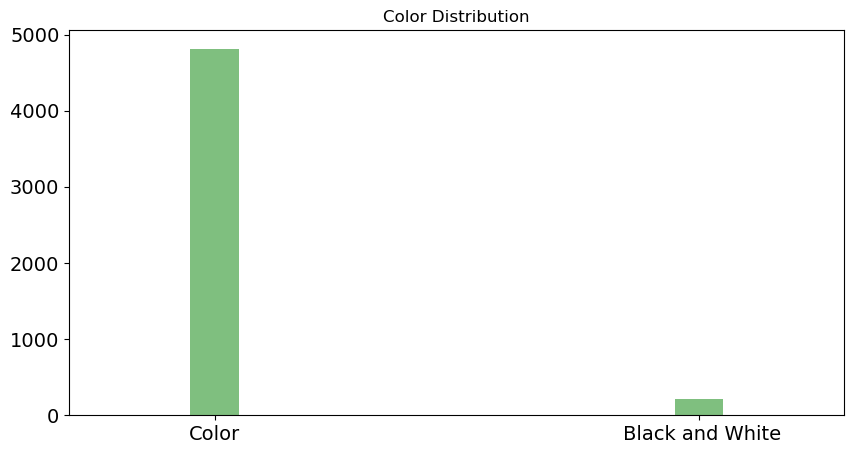

In [8]:
data['color'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0, title='Color Distribution', color='green', alpha=0.5, width=0.1, position=0.5, fontsize=14)

In [9]:
data.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [10]:
data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [11]:
data['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

In [12]:
data['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [13]:
data.movie_title[data['language'] == 'Japanese']

98                      Godzilla Resurgence 
204                     Godzilla Resurgence 
1517                                  Ponyo 
1761                  Harlock: Space Pirate 
2047                   Howl's Moving Castle 
2241    Yu-Gi-Oh! Duel Monsters             
2323                      Princess Mononoke 
2334                               Steamboy 
2373                          Spirited Away 
2863                  Letters from Iwo Jima 
3012                Space Battleship Yamato 
3020                               Madadayo 
3423                                  Akira 
3684                                   R100 
4064                   Pokémon 3: The Movie 
4542                          Godzilla 2000 
4747                          Seven Samurai 
5029                               The Cure 
Name: movie_title, dtype: object

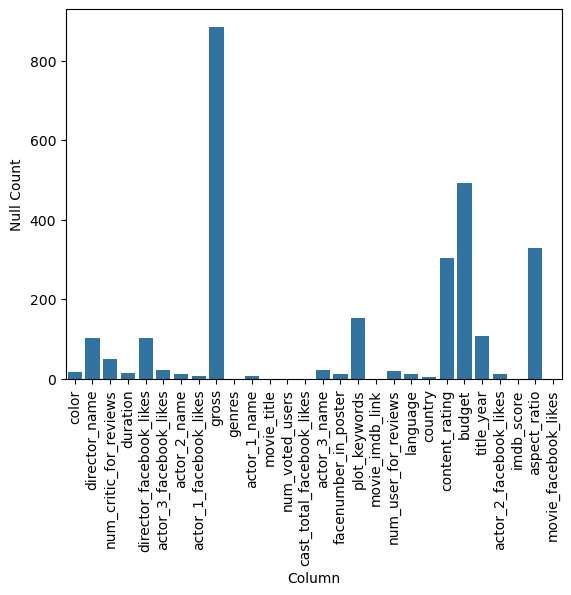

In [14]:
null = pd.DataFrame(zip(data.columns, data.isnull().sum()), columns=['Column', 'Null Count'])
sns.barplot(x='Column', y='Null Count', data=null)
plt.xticks(rotation=90)
plt.show()

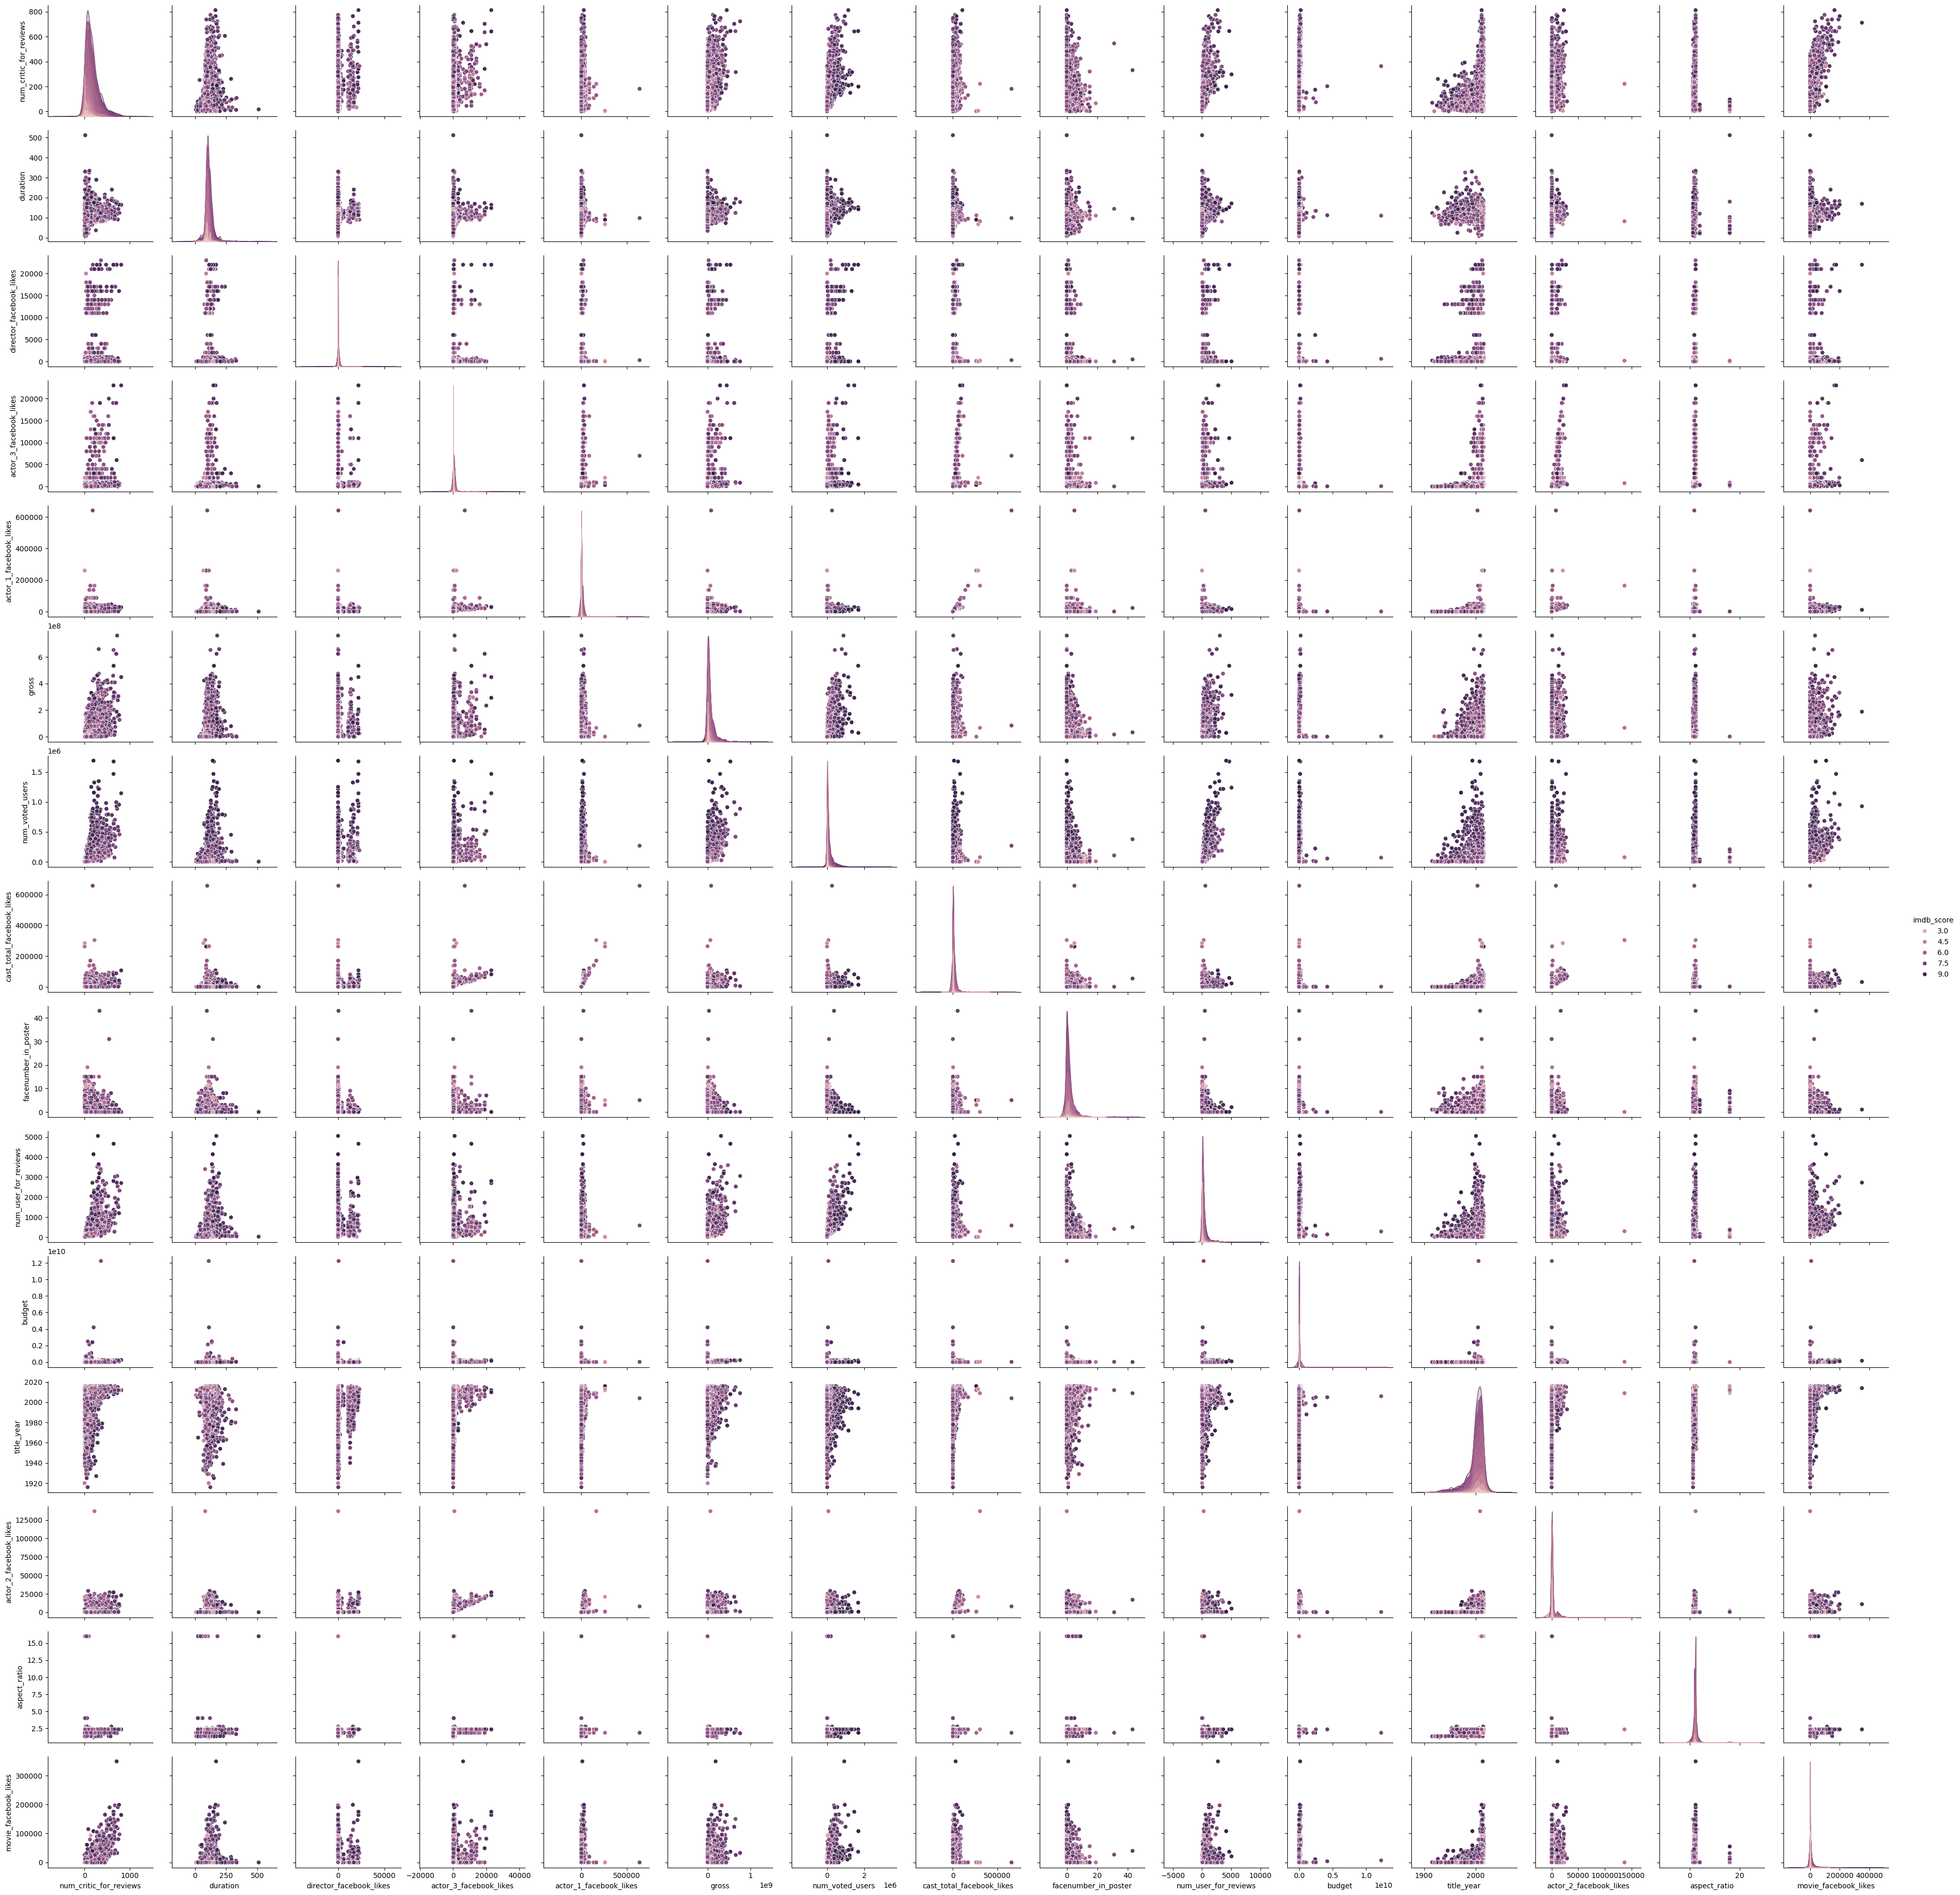

In [15]:
sns.pairplot(data, hue='imdb_score')

# <center>  **`Data Cleaning or Flitering`** </center>

In [16]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [17]:
# Reading Dataset for not damaging the previous visualisation

df = pd.read_csv('movie_metadata.csv')

# data arrangement
df = df[['duration','director_facebook_likes','gross','budget','actor_1_facebook_likes','genres','imdb_score','num_critic_for_reviews','facenumber_in_poster','num_user_for_reviews','actor_3_facebook_likes','actor_2_facebook_likes','num_voted_users']]

# Turning IMDb score into categorical data
df['imdb_score_category'] = pd.cut(df.imdb_score,bins=[0,4,6,8,10], right=True, labels=['bad', 'average', 'good', 'excellent'])

# Column Modification
df['other_actors_likes'] = df['actor_3_facebook_likes'] + df['actor_2_facebook_likes']
df['genre'] = df['genres'].str.split('|').str[0]
ord_enc = OrdinalEncoder()
df['genre_code'] = ord_enc.fit_transform(df[['genre']])
df.drop(df[(np.abs(stats.zscore(df['gross']))<3)],axis=1)
df.dropna(inplace=True)
df.head()

duration  director_facebook_likes        gross       budget  \
0     178.0                      0.0  760505847.0  237000000.0   
1     169.0                    563.0  309404152.0  300000000.0   
2     148.0                      0.0  200074175.0  245000000.0   
3     164.0                  22000.0  448130642.0  250000000.0   
5     132.0                    475.0   73058679.0  263700000.0   

   actor_1_facebook_likes                           genres  imdb_score  \
0                  1000.0  Action|Adventure|Fantasy|Sci-Fi         7.9   
1                 40000.0         Action|Adventure|Fantasy         7.1   
2                 11000.0        Action|Adventure|Thriller         6.8   
3                 27000.0                  Action|Thriller         8.5   
5                   640.0          Action|Adventure|Sci-Fi         6.6   

   num_critic_for_reviews  facenumber_in_poster  num_user_for_reviews  \
0                   723.0                   0.0                3054.0   
1                   302.0                   0.0                1238.0   
2                   602.0                   1.0                 994.0   
3                   813.0                   0.0                2701.0   
5                   462.0                   1.0                 738.0   

   actor_3_facebook_likes  actor_2_facebook_likes  num_voted_users  \
0                   855.0                   936.0           886204   
1                  1000.0                  5000.0           471220   
2                   161.0                   393.0           275868   
3                 23000.0                 23000.0          1144337   
5                   530.0                   632.0           212204   

  imdb_score_category  other_actors_likes   genre  genre_code  
0                good              1791.0  Action         0.0  
1                good              6000.0  Action         0.0  
2                good               554.0  Action         0.0  
3           excellent             46000.0  Action         0.0  
5                good              1162.0  Action         0.0

In [18]:
df.describe()

duration  director_facebook_likes         gross        budget  \
count  3873.000000              3873.000000  3.873000e+03  3.873000e+03   
mean    109.946037               784.480506  5.110301e+07  4.526137e+07   
std      22.670177              3024.287706  6.978767e+07  2.228692e+08   
min      34.000000                 0.000000  1.620000e+02  2.180000e+02   
25%      95.000000                10.000000  6.855137e+06  1.000000e+07   
50%     106.000000                58.000000  2.804554e+07  2.400000e+07   
75%     120.000000               226.000000  6.526901e+07  5.000000e+07   
max     330.000000             23000.000000  7.605058e+08  1.221550e+10   

       actor_1_facebook_likes   imdb_score  num_critic_for_reviews  \
count             3873.000000  3873.000000             3873.000000   
mean              7603.002582     6.462536              163.377227   
std              15389.732198     1.056813              123.804629   
min                  0.000000     1.600000                1.000000   
25%                723.000000     5.900000               73.000000   
50%               1000.000000     6.600000              134.000000   
75%              12000.000000     7.200000              222.000000   
max             640000.000000     9.300000              813.000000   

       facenumber_in_poster  num_user_for_reviews  actor_3_facebook_likes  \
count           3873.000000           3873.000000             3873.000000   
mean               1.381875            327.942422              754.340821   
std                2.056549            408.290669             1868.417639   
min                0.000000              1.000000                0.000000   
25%                0.000000            102.000000              183.000000   
50%                1.000000            203.000000              427.000000   
75%                2.000000            392.000000              687.000000   
max               43.000000           5060.000000            23000.000000   

       actor_2_facebook_likes  num_voted_users  other_actors_likes  \
count             3873.000000     3.873000e+03         3873.000000   
mean              1976.335399     1.027982e+05         2730.676220   
std               4492.134364     1.507131e+05         5742.698531   
min                  0.000000     5.000000e+00            0.000000   
25%                367.000000     1.736500e+04          583.000000   
50%                664.000000     5.091900e+04         1120.000000   
75%                972.000000     1.246410e+05         1668.000000   
max             137000.000000     1.689764e+06       137748.000000   

        genre_code  
count  3873.000000  
mean      3.830622  
std       3.484428  
min       0.000000  
25%       1.000000  
50%       4.000000  
75%       6.000000  
max      20.000000

In [19]:
df.genre.value_counts()

Comedy         1035
Action          968
Drama           700
Adventure       375
Crime           260
Biography       207
Horror          164
Animation        45
Documentary      38
Fantasy          37
Mystery          23
Sci-Fi            8
Family            3
Western           3
Thriller          3
Romance           2
Musical           2
Name: genre, dtype: int64

In [20]:
df.imdb_score_category.value_counts()

good         2530
average      1083
excellent     162
bad            98
Name: imdb_score_category, dtype: int64

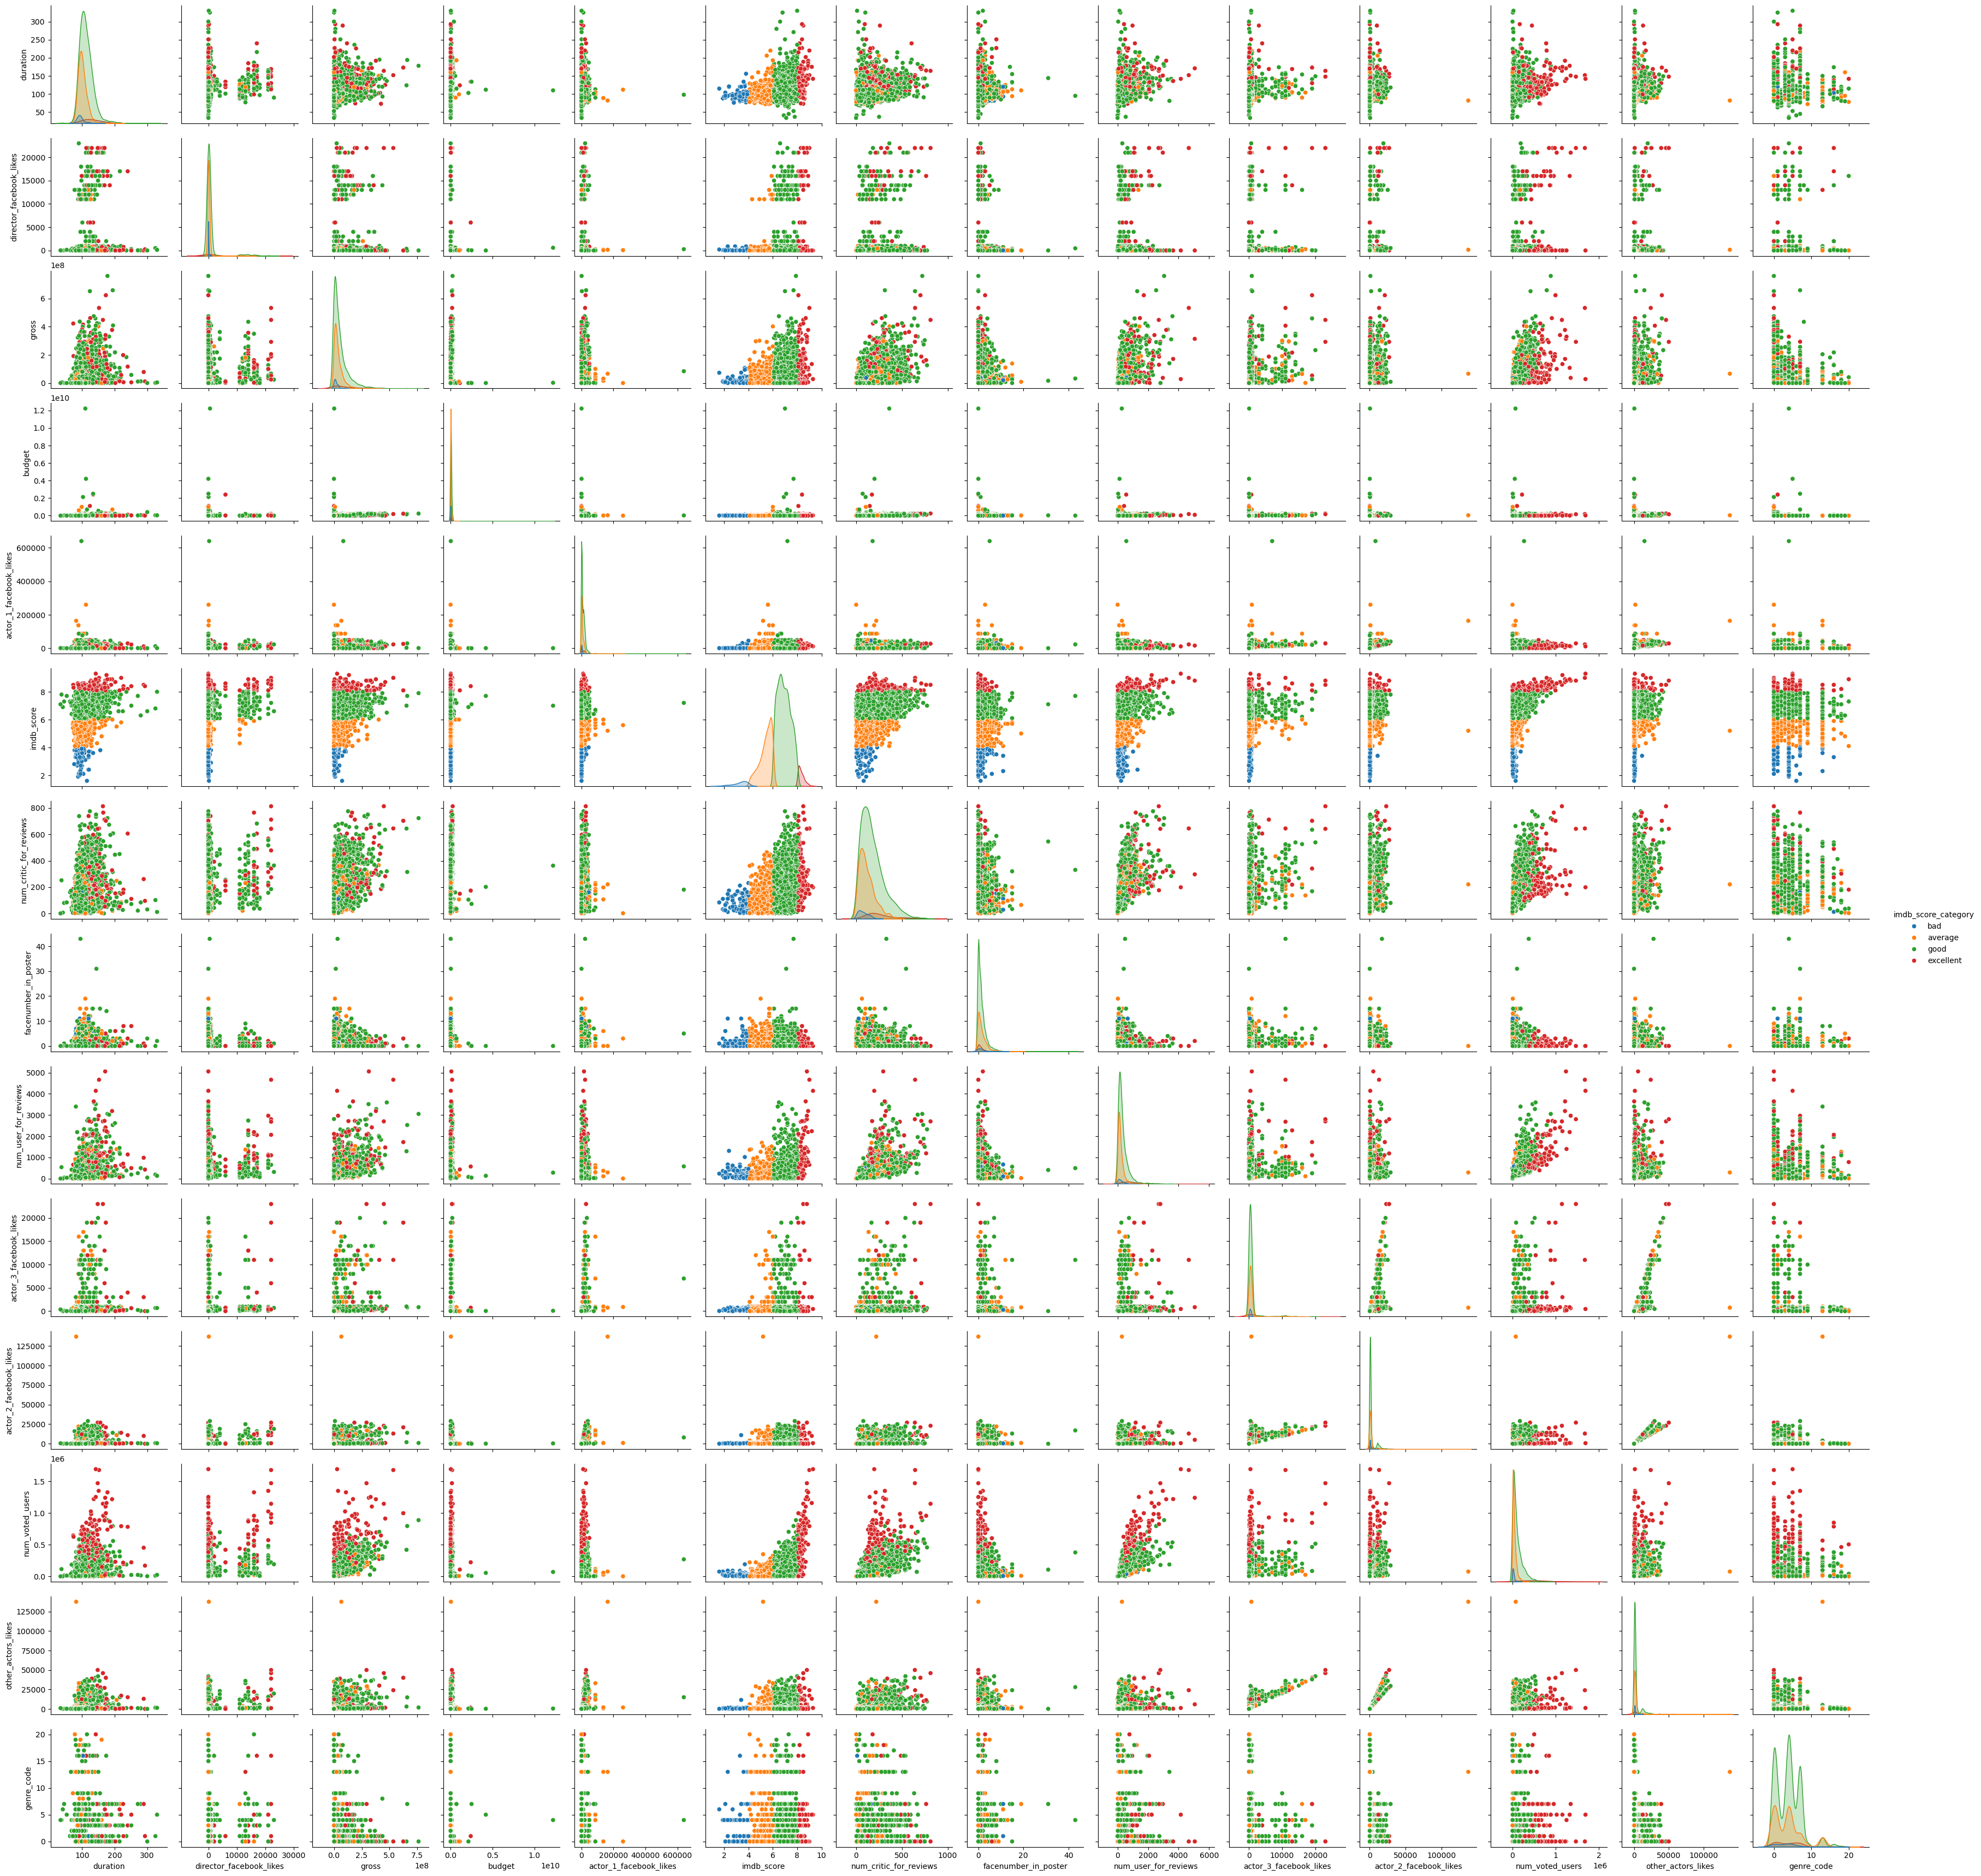

In [21]:
sns.pairplot(
    df,
    hue="imdb_score_category"
)

<AxesSubplot:xlabel='num_critic_for_reviews'>

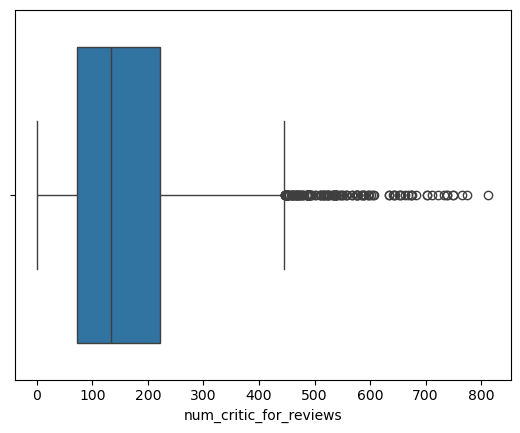

In [22]:
sns.boxplot(x='num_critic_for_reviews', data=df)

<AxesSubplot:xlabel='duration'>

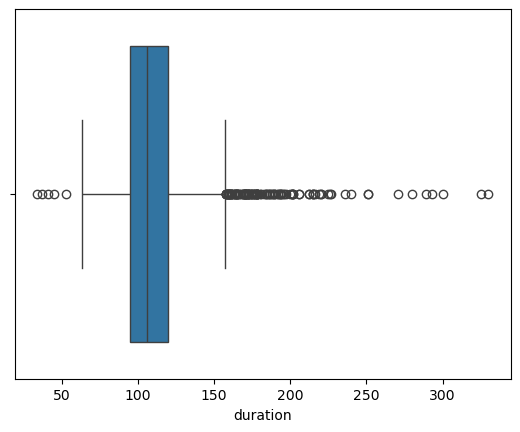

In [23]:
sns.boxplot(x='duration',data=df)

<AxesSubplot:xlabel='gross'>

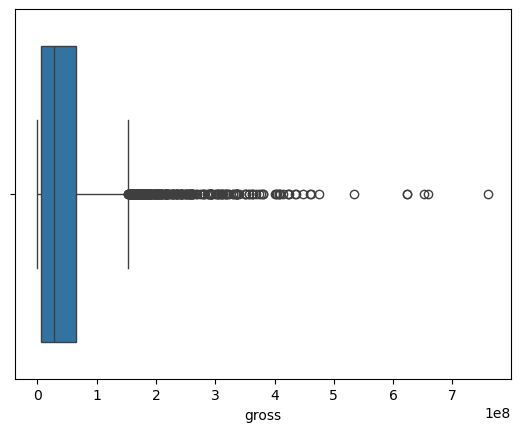

In [24]:
sns.boxplot(x='gross',data=df)

<AxesSubplot:xlabel='director_facebook_likes'>

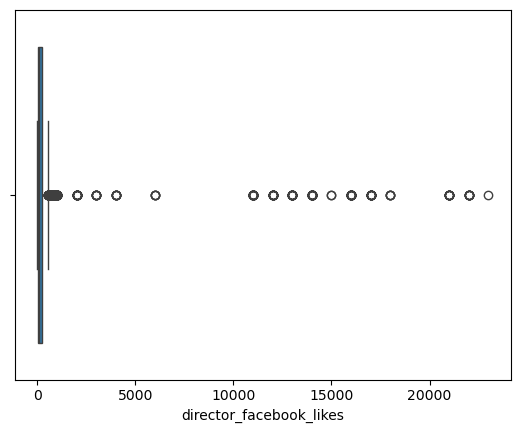

In [25]:
sns.boxplot(x='director_facebook_likes',data=df)

<AxesSubplot:xlabel='budget'>

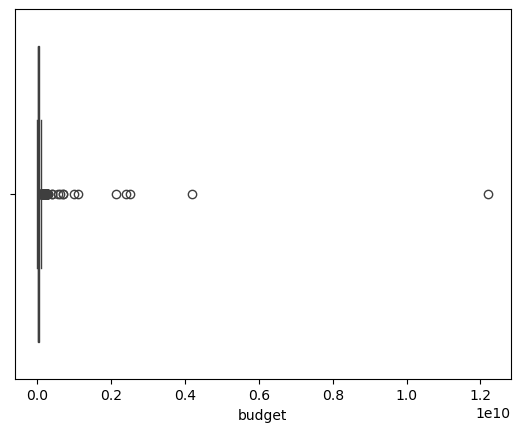

In [26]:
sns.boxplot(x='budget',data=df)

<AxesSubplot:xlabel='genre_code'>

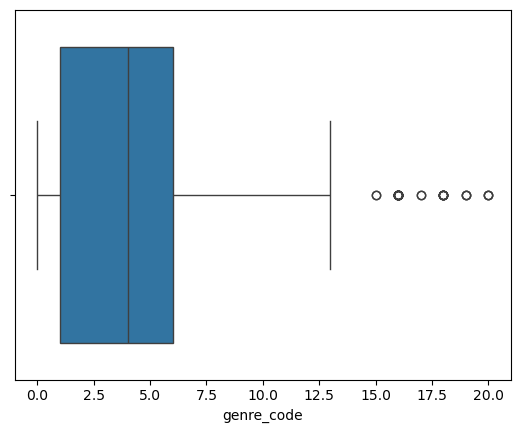

In [27]:
sns.boxplot(x='genre_code',data=df)

<AxesSubplot:xlabel='facenumber_in_poster'>

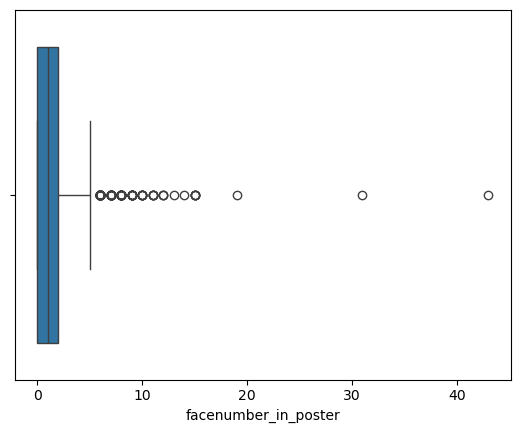

In [28]:
sns.boxplot(x='facenumber_in_poster',data=df)

# <center>  **`Data Modeling`** </center>

In [29]:
df.columns

Index(['duration', 'director_facebook_likes', 'gross', 'budget',
       'actor_1_facebook_likes', 'genres', 'imdb_score',
       'num_critic_for_reviews', 'facenumber_in_poster',
       'num_user_for_reviews', 'actor_3_facebook_likes',
       'actor_2_facebook_likes', 'num_voted_users', 'imdb_score_category',
       'other_actors_likes', 'genre', 'genre_code'],
      dtype='object')

In [30]:
sc = StandardScaler()
sc.fit(df[['duration','director_facebook_likes','actor_1_facebook_likes','other_actors_likes','budget','genre_code','num_voted_users','num_critic_for_reviews','facenumber_in_poster','num_user_for_reviews']])


X = np.array(sc.transform(df[['duration','director_facebook_likes','actor_1_facebook_likes','other_actors_likes','budget','genre_code','num_voted_users','num_critic_for_reviews','facenumber_in_poster','num_user_for_reviews']]))
Y = np.array(df['imdb_score']).ravel()

xtrain,xtest,ytrain,ytest = train_test_split( X, Y, test_size=0.25, random_state=0)

In [31]:
print(f"X-train Shape:{xtrain.shape} \t X-test Shape:{xtest.shape}\nY-train Shape:{ytrain.shape}\t\t Y-test Shape:{ytest.shape}\n")

X-train Shape:(2904, 10) 	 X-test Shape:(969, 10)
Y-train Shape:(2904,)		 Y-test Shape:(969,)



# <center>  **`Regression`** </center>


<div class="alert alert-info" style="width:210px; border-radius:10px;">Linear Regression Prediction</div>

In [32]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

LinearRegression()

In [33]:
pred = linreg.predict(xtest)
LR = r2_score(ytest,pred)

print("Linear Regression Rating Accuracy: ", LR)

Linear Regression Rating Accuracy:  0.29521238523565496


<div class="alert alert-danger" style="width:250px; border-radius:10px;">Polynomial Regression Prediction</div>


In [34]:
polyreg = PolynomialFeatures(degree=3)
x_poly = polyreg.fit_transform(X)

In [35]:
linreg.fit(x_poly, Y)
PRpred = linreg.predict(x_poly)
PR = r2_score(Y,PRpred)
print("Polynomial Regression Rating Accuracy: ", PR)

Polynomial Regression Rating Accuracy:  0.49818933734570336


# <center>  **`Decision Tree Regressor`** </center>

In [36]:
dectree = DecisionTreeRegressor()
dectree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [37]:
DTpred = dectree.predict(xtest)
DT = r2_score(ytest,DTpred)
print("Decision Tree Regressor :", DT)

Decision Tree Regressor : 0.029468222692973445


# <center>  **`Ranndom Forest Regressor`** </center>

In [38]:
randreg = RandomForestRegressor(n_estimators=1000, random_state=10)
randreg.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=1000, random_state=10)

In [39]:
randpred = randreg.predict(xtest)
rfres = r2_score(ytest, randpred)

print("Random Forest Regressor ", rfres)

Random Forest Regressor  0.5417725175129564


In [40]:
accuracy = [LR , PR, DT, rfres]
model = ['Logistic Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest']

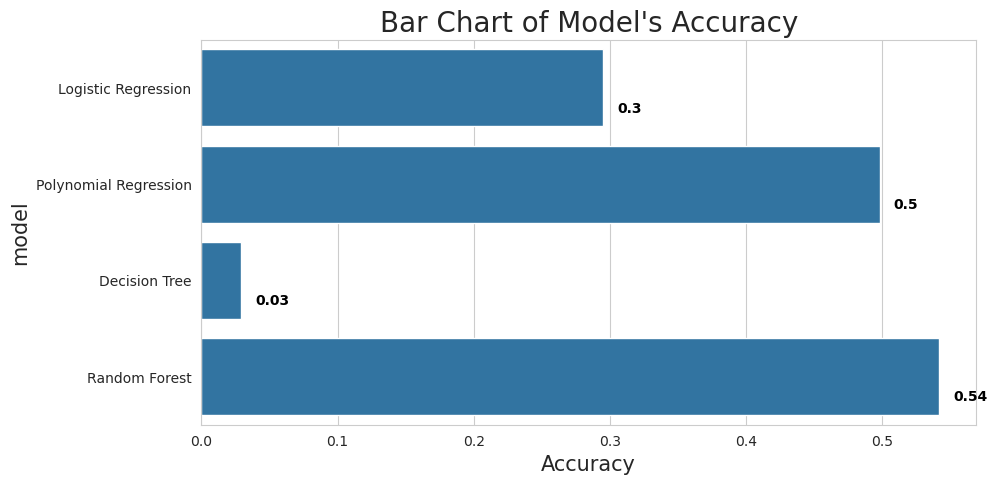

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title("Bar Chart of Model's Accuracy", fontsize=20)
plt.xlabel('Accuracy', fontsize=15)
plt.ylabel('model', fontsize=15)
sns.barplot(x=accuracy, y=model)
for i, v in enumerate(accuracy):
    plt.text(v + 0.01, i + 0.25, str(round(v,2)), color='black', fontweight='bold')

####  *`As per the above bar chart we can see that the Random forest has the highest r2-score.`* 

In [42]:
X3 = np.array(sc.transform(df[['duration','director_facebook_likes','actor_1_facebook_likes','other_actors_likes','budget','genre_code','num_voted_users','num_critic_for_reviews','facenumber_in_poster','num_user_for_reviews']]))
Y3 = np.array(df['imdb_score_category']).ravel()
X_train,X_test,Y_train,Y_test = train_test_split(X3,Y3,test_size=0.1)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import KFold, cross_val_score

models = []

models.append(('KNeighbour :', KNeighborsClassifier(n_neighbors=28)))
models.append(('Decision Tree : ', DecisionTreeClassifier()))
models.append(("Random Forest: ", RandomForestClassifier(n_estimators=1000)))
models.append(('NBG :', GaussianNB()))
models.append(('NBB :', BernoulliNB()))

names = []
results = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(cv_results)

In [44]:
for i in range(len(names)):
    print(names[i], results[i].mean()*100)

KNeighbour : 70.04059216809934
Decision Tree :  65.88207686987452
Random Forest:  76.12521819319566
NBG : 29.269423311267005
NBB : 59.1686427559859


# <center>  **`Sample Prediction`** </center>


In [45]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10)
RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [46]:
res = RF.predict(X_test)
RF.predict([[120,100000,1200,1000,3,10,1,450,0,10]])


array(['good'], dtype=object)

In [47]:
count = 0
for i in range(len(res)):
    if res[i] == Y_test[i]:
        count+=1
    else:
        pass

result = count/len(res)
print("Accuracy: ", result)

Accuracy:  0.7783505154639175


# <center>  **`Exporting Model`** </center>

In [48]:
import pickle as pkl 

pkl.dump(RF, open('model.pkl', 'wb'))

In [53]:
rftest = pkl.load(open('model.pkl','rb'))
rftest.score(X_train,Y_train)*100,rftest.score(X_test,Y_test)*100

(90.04304160688665, 77.83505154639175)